# 時間

https://docs.astropy.org/en/stable/time/index.html

In [167]:
from astropy.time import Time
t        = Time("2021-06-10 12:00")
t_launch = Time("1977-08-20 12:00")
t_arrive = Time("1987-08-20 12:00")

In [168]:
t

<Time object: scale='utc' format='iso' value=2021-06-10 12:00:00.000>

In [169]:
t.value

'2021-06-10 12:00:00.000'

In [170]:
# subfnt :　date_hms, date_hm, date
t.to_value('iso', subfmt='date')

'2021-06-10'

In [171]:
#傳換成天為單位的時間
t.jd

2459376.0

In [172]:
time_duration = np.arange(t_launch.jd,t_arrive.jd+1,1)
time_test = np.arange(t_launch.jd,t_launch.jd+365,1)

In [191]:
time_test

array([2443376., 2443377., 2443378., 2443379., 2443380., 2443381.,
       2443382., 2443383., 2443384., 2443385., 2443386., 2443387.,
       2443388., 2443389., 2443390., 2443391., 2443392., 2443393.,
       2443394., 2443395., 2443396., 2443397., 2443398., 2443399.,
       2443400., 2443401., 2443402., 2443403., 2443404., 2443405.,
       2443406., 2443407., 2443408., 2443409., 2443410., 2443411.,
       2443412., 2443413., 2443414., 2443415., 2443416., 2443417.,
       2443418., 2443419., 2443420., 2443421., 2443422., 2443423.,
       2443424., 2443425., 2443426., 2443427., 2443428., 2443429.,
       2443430., 2443431., 2443432., 2443433., 2443434., 2443435.,
       2443436., 2443437., 2443438., 2443439., 2443440., 2443441.,
       2443442., 2443443., 2443444., 2443445., 2443446., 2443447.,
       2443448., 2443449., 2443450., 2443451., 2443452., 2443453.,
       2443454., 2443455., 2443456., 2443457., 2443458., 2443459.,
       2443460., 2443461., 2443462., 2443463., 2443464., 24434

# 座標

https://pypi.org/project/jplephem/

In [173]:
from jplephem.spk import SPK
kernel = SPK.open('de421.bsp')
print(kernel)

File type DAF/SPK and format LTL-IEEE with 15 segments:
2414864.50..2471184.50  Solar System Barycenter (0) -> Mercury Barycenter (1)
2414864.50..2471184.50  Solar System Barycenter (0) -> Venus Barycenter (2)
2414864.50..2471184.50  Solar System Barycenter (0) -> Earth Barycenter (3)
2414864.50..2471184.50  Solar System Barycenter (0) -> Mars Barycenter (4)
2414864.50..2471184.50  Solar System Barycenter (0) -> Jupiter Barycenter (5)
2414864.50..2471184.50  Solar System Barycenter (0) -> Saturn Barycenter (6)
2414864.50..2471184.50  Solar System Barycenter (0) -> Uranus Barycenter (7)
2414864.50..2471184.50  Solar System Barycenter (0) -> Neptune Barycenter (8)
2414864.50..2471184.50  Solar System Barycenter (0) -> Pluto Barycenter (9)
2414864.50..2471184.50  Solar System Barycenter (0) -> Sun (10)
2414864.50..2471184.50  Earth Barycenter (3) -> Moon (301)
2414864.50..2471184.50  Earth Barycenter (3) -> Earth (399)
2414864.50..2471184.50  Mercury Barycenter (1) -> Mercury (199)
241486

In [174]:
import numpy as np
np.set_printoptions(precision=3)
#postion 單位是km

In [175]:
#以太陽"0"為原點的地球"3"[0,3]
position = kernel[0,3].compute(time_test)
position=position/149597871
print(position)

[[ 0.857  0.866  0.874 ...  0.83   0.839  0.848]
 [-0.5   -0.487 -0.474 ... -0.542 -0.529 -0.516]
 [-0.217 -0.211 -0.205 ... -0.235 -0.23  -0.224]]


In [186]:
position[0][0]

0.857059549062007

# 繪圖

https://hackmd.io/@yizhewang/ByEgnsY0H

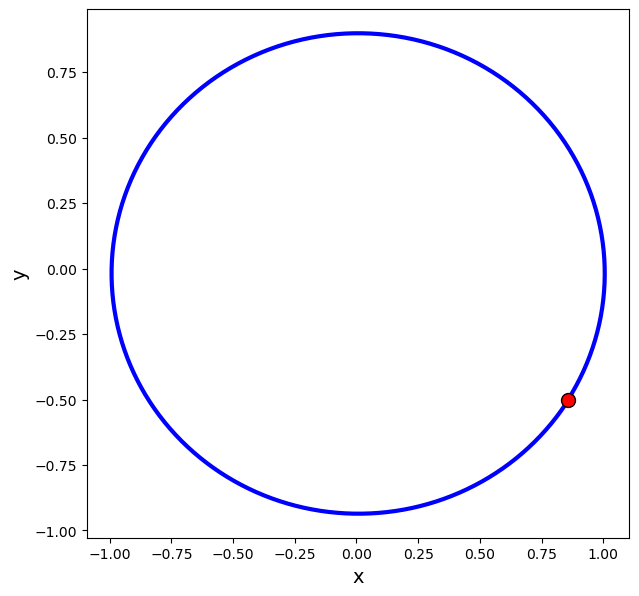

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

"""
 1.參數設定
"""

#動畫格數
N=365

"""
 2.繪圖
"""
fig = plt.figure(figsize=(7, 7), dpi=100)
ax = fig.gca()
line, = ax.plot(position[0][:], position[1][:], color='blue', linestyle='-', linewidth=3)
dot, = ax.plot([], [], color='red', marker='o', markersize=10, markeredgecolor='black', linestyle='')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

def update(i):
    dot.set_data(position[0][i], position[1][i])
    return dot,

def init():
    dot.set_data(position[0][0], position[1][0])
    return dot,

ani = animation.FuncAnimation(fig=fig, func=update, frames=N, init_func=init, interval=365/N, blit=True, repeat=True)
plt.show()
#pillow是gif用的writer
ani.save('MovingPointMatplot.gif', writer='pillow', fps=1/0.03)

In [124]:
jd = np.array([2457061.5, 2457062.5, 2457063.5, 2457064.5])
position = kernel[0,3].compute(jd)
print(position)

[[-1.104e+08 -1.121e+08 -1.138e+08 -1.154e+08]
 [ 8.931e+07  8.751e+07  8.569e+07  8.384e+07]
 [ 3.869e+07  3.791e+07  3.712e+07  3.632e+07]]


https://docs.astropy.org/en/stable/coordinates/solarsystem.html

In [99]:
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon

loc = EarthLocation.of_site('greenwich') 
with solar_system_ephemeris.set('builtin'):
    jup = get_body('jupiter', t, loc) 
jup  

<SkyCoord (GCRS: obstime=2014-09-22 23:22:00.000, obsgeoloc=(3949481.6923192, -550931.90668394, 4961151.73597576) m, obsgeovel=(40.15954083, 287.47876681, -0.04597885) m / s): (ra, dec, distance) in (deg, deg, AU)
    (136.91116209, 17.02935409, 5.94386022)>

In [60]:
solar_system_ephemeris.set('de432s') 

<ScienceState solar_system_ephemeris: 'de432s'>

In [61]:
get_body('jupiter', t, loc) 

<SkyCoord (GCRS: obstime=2014-09-22 23:22:00.000, obsgeoloc=(3949481.6923049, -550931.9066788, 4961151.73597586) m, obsgeovel=(40.15954083, 287.47871186, -0.04597878) m / s): (ra, dec, distance) in (deg, deg, km)
    (136.90234802, 17.03160667, 8.89196021e+08)>

In [70]:
get_body('earth', t, loc) 

<SkyCoord (GCRS: obstime=2014-09-22 23:22:00.000, obsgeoloc=(3949481.6923192, -550931.90668394, 4961151.73597576) m, obsgeovel=(40.15954083, 287.47876681, -0.04597885) m / s): (ra, dec, distance) in (deg, deg, AU)
    (172.05047643, -51.20602058, 4.25483071e-05)>

In [63]:
get_body_barycentric('moon', t) 

<CartesianRepresentation (x, y, z) in km
    (1.50107535e+08, -866789.11996806, -418963.55218447)>

In [65]:
solar_system_ephemeris.bodies 

('sun',
 'mercury',
 'venus',
 'earth-moon-barycenter',
 'earth',
 'moon',
 'mars',
 'jupiter',
 'saturn',
 'uranus',
 'neptune',
 'pluto')

In [66]:
solar_system_ephemeris.set('builtin')

<ScienceState solar_system_ephemeris: 'builtin'>

In [67]:
solar_system_ephemeris.bodies

('earth',
 'sun',
 'moon',
 'mercury',
 'venus',
 'earth-moon-barycenter',
 'mars',
 'jupiter',
 'saturn',
 'uranus',
 'neptune')